## Question 2:
* Which problems can be solved quickly but have not been solved?
* Can you pinpoint the reason why? 

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

## Functions

In [42]:
import numpy as np
def makeList(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

# the_df.type = the_df.type.apply(makelist)
# the_df = the_df.explode('type')

In [43]:
import requests
def reverse_geocode(lat, lng, api_key):
    # Base URL for the API
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Parameters for the request
    params = {
        "latlng": f"{lat},{lng}",
        "key": api_key
    }
    
    # Make the GET request
    response = requests.get(url, params=params)
    
    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        if data.get('results'):
            return data['results'][0]['formatted_address']
        else:
            return "No address found for the given coordinates."
    else:
        return f"Error: {response.status_code}, {response.text}"

# Example usage
latitude = 100.48093
longitude = 13.75001
your_api_key = "YOUR_API_KEY"
address = reverse_geocode(latitude, longitude, your_api_key)
print(f"Address: {address}")

Address: Error: 400, {
   "error_message" : "Invalid request. Invalid 'latlng' parameter.",
   "results" : [],
   "status" : "INVALID_REQUEST"
}


In [44]:
import requests
def get_location_from_coordinates(lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse"
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'json',
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        address = data.get("address", {})
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    else:
        return None, None

# Example usage
latitude = 100.5018
longitude = 13.7563
region, province = get_location_from_coordinates(latitude, longitude)
print(f"Region: {region}, Province: {province}")


Region: None, Province: None


In [45]:
import geopy
from geopy.geocoders import Nominatim 
import ssl
import certifi
from geopy.adapters import AioHTTPAdapter
from geopy.geocoders import options
def get_location_with_geopy(lat, lon):
    ctx = ssl.create_default_context(cafile=certifi.where())
    geopy.geocoders.options.default_ssl_context = ctx   
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), language="en")
    if location and location.raw.get("address"):
        address = location.raw["address"]
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    return None, None

# Example usage
latitude = 13.7563
longitude = 100.5018 
region, province = get_location_with_geopy(latitude, longitude)
print(f"Region: {region}, Province: {province}")

Region: Region not found, Province: Province not found


## EDA

In [46]:
cases = pd.read_csv('Traffy_Cases_from_2022-05-22_to_2024-12-11.csv')

In [47]:
logs = pd.read_csv('Log_from_2022-05-22_to_2024-12-11.csv')

In [48]:
display(cases.shape)
display(logs.shape)

(772938, 16)

(2035022, 3)

In [49]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772938 entries, 0 to 772937
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ticket_id            772938 non-null  object 
 1   type                 772937 non-null  object 
 2   organization_action  772937 non-null  object 
 3   comment              772937 non-null  object 
 4   coords               772935 non-null  object 
 5   photo                772838 non-null  object 
 6   photo_after          614548 non-null  object 
 7   address              772935 non-null  object 
 8   subdistrict          772495 non-null  object 
 9   district             772492 non-null  object 
 10  province             772866 non-null  object 
 11  state                772935 non-null  object 
 12  star                 263926 non-null  float64
 13  count_reopen         772933 non-null  float64
 14  last_activity        772931 non-null  object 
 15  view_count       

In [50]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035022 entries, 0 to 2035021
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ticket_id  object
 1   state      object
 2   timestamp  object
dtypes: object(3)
memory usage: 46.6+ MB


In [51]:
cases.head()

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
0,2024-6UUBZ2,เสียง,"เขตบางพลัด, กรุงเทพมหานคร",เพื่อนบ้านเปิดเพลงเสียงดังรบกวนผ่านเครื่องขยาย...,"100.49996,13.79136",https://storage.googleapis.com/traffy_public_b...,NaN,155 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...,บางพลัด,บางพลัด,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:22,0.0
1,2024-CYP76V,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/7ใ...,"100.5263,13.70647",https://storage.googleapis.com/traffy_public_b...,NaN,308 ถ. จันทน์ แขวงทุ่งวัดดอน เขตสาทร กรุงเทพมห...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:14,0.0
2,2024-8U78XH,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",จัดงานตลาดนัด จัดระเบียบได้ดีให้รถมอเตอร์ไซค์เ...,"100.52758,13.70599",https://storage.googleapis.com/traffy_public_b...,NaN,1928/3 ซอย จันทน์ 23/2 แขวงทุ่งวัดดอน เขตสาทร ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:09:51,0.0
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555",ปัญหา: บริเวณหน้าบ้านเลขที่ดังกล่าว พบผู้อาศัย...,"100.44078,13.68686",https://storage.googleapis.com/traffy_public_b...,NaN,10/101 ซอย เอกชัย 46 แขวงคลองบางพราน เขตบางบอน...,คลองบางพราน,บางบอน,กรุงเทพมหานคร,forward,NaN,0.0,2024-12-11 20:09:11,0.0
4,2024-78EH2R,อื่นๆ,"เขตราชเทวี, กรุงเทพมหานคร",จอด,"100.53401,13.75657",https://storage.googleapis.com/traffy_public_b...,NaN,BTS Phaya Thai Phaya Thai Road Thanon Phaya Th...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:08:41,0.0


In [52]:
logs.head()

,ticket_id,state,timestamp
0,2024-6UUBZ2,reported,2024-12-11 20:14:18
1,2024-CYP76V,reported,2024-12-11 20:14:08
2,2024-8U78XH,reported,2024-12-11 20:09:46
3,RXTPAP,reported,2024-12-11 20:09:08
4,2024-78EH2R,reported,2024-12-11 20:08:36


### Null Values

<Axes: >

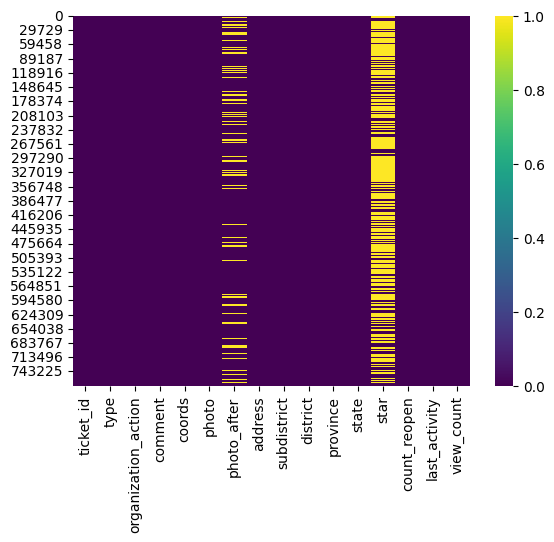

In [53]:
# Use heatmap to visualize null values
sns.heatmap(cases.isnull(), cmap='viridis')

#### organization_action

In [54]:
cases.isnull().sum()

ticket_id                   0
type                        1
organization_action         1
comment                     1
coords                      3
photo                     100
photo_after            158390
address                     3
subdistrict               443
district                  446
province                   72
state                       3
star                   509012
count_reopen                5
last_activity               7
view_count                  5
dtype: int64

In [55]:
cases.loc[cases['organization_action'].isnull()]

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
407188,และความเป็นระเบียบเรียบร้อยของบ้านเมือง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
cases.dropna(subset=['organization_action'], inplace=True)
display(cases.shape)

(772937, 16)

#### coords

In [57]:
cases.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      2
photo                      99
photo_after            158389
address                     2
subdistrict               442
district                  445
province                   71
state                       2
star                   509011
count_reopen                4
last_activity               6
view_count                  4
dtype: int64

In [58]:
cases[cases['coords'].isnull()]

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
94580,2024-LZ8TT4,ถนน,"ฝ่ายรักษาความสะอาดฯ เขตวัฒนา, ฝ่ายโยธา เขตวัฒน...",ล้ำเข้ามาในเขตถนนเกือบ 1 เมตร ต้นไม้ปลูกในที่ส...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407187,2023-NYEK83,ทางเท้า,"ฝ่ายเทศกิจ เขตป้อมปราบศัตรูพ่าย, เขตป้อมปราบศั...",ขอให้ท่านผู้ว่าราชการกรุงเทพมหานครช่วยดำเนินกา...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
cases[cases['coords'].isnull()]['ticket_id'].tolist()

['2024-LZ8TT4', '2023-NYEK83']

In [60]:
logs[logs['ticket_id'] == '2024-LZ8TT4']

,ticket_id,state,timestamp
231876,2024-LZ8TT4,reported,2024-08-26 15:27:13
231877,2024-LZ8TT4,inprogress,2024-08-26 15:46:13
231878,2024-LZ8TT4,finish,2024-10-21 12:32:13


In [61]:
logs[logs['ticket_id'] == '2023-NYEK83']

,ticket_id,state,timestamp
1052756,2023-NYEK83,reported,2023-08-25 06:35:49
1052757,2023-NYEK83,inprogress,2023-08-25 08:58:49
1052758,2023-NYEK83,finish,2023-08-26 10:06:49


These two ids have a lot of missing values, but both have clear logging times in logs DataFrame.

In [62]:
cases[cases['coords'].isnull()]['comment'].tolist()

['ล้ำเข้ามาในเขตถนนเกือบ 1 เมตร ต้นไม้ปลูกในที่สาธารณะนอกเขตโฉนดตนเอง ทำให้ซอยที่แคบอยู่แล้วยิ่งแคบเข้าไปอีกเกิดอุบัติเหตุประจำ  เป็นทางลัดที่การจราจรหนาแน่นมาก.. ปากซอยปรีดี 25 ตรงข้ามเจริญมิตรอพาร์ทเม้นท์เขตวัฒนากรุงเทพฯ .. ถ่ายเมื่อ 0608 น 26 สค 67',
 'ขอให้ท่านผู้ว่าราชการกรุงเทพมหานครช่วยดำเนินการคืนทางเท้าให้แก่ประชาชนบริเวณหน้าปอเต็กตึ้งถนนพลับพลาไชยปัจจุบันแม่ค้ายึดทางเท้าตั้งวางสินค้าและนั่งกีดขวางทางเท้าประชาชนไม่สามารถเดินบนทางเท้าได้เป็นการกระทำผิดตามพระราชบัญญัติรักษาความสะอาด']

This is because the reporters included all the details in the comment. Since I want to use DataFrame without any null for other purposes, the rows will be removed.

In [63]:
cases.dropna(subset=['coords'], inplace=True)
display(cases.shape)

(772935, 16)

Will not remove anything from logs DataFrame yet because will later use left-join to cases DataFrame.

#### photo and photo_after

In [64]:
cases.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      0
photo                      97
photo_after            158387
address                     0
subdistrict               440
district                  443
province                   69
state                       0
star                   509009
count_reopen                2
last_activity               4
view_count                  2
dtype: int64

Since these columns have no use for now, they will be dropped.

In [65]:
cases.drop(columns=['photo', 'photo_after'], inplace=True)
display(cases.shape)

(772935, 14)

#### subdistrict, district, and province

In [66]:
cases.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      0
address                     0
subdistrict               440
district                  443
province                   69
state                       0
star                   509009
count_reopen                2
last_activity               4
view_count                  2
dtype: int64

In [67]:
cases[cases['subdistrict'].isnull()]

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
22339,2024-86F4R2,ผิดกฎจราจร,"เขตบางกอกน้อย, กองบังคับการตำรวจนครบาล 7 (บก.น...",รถยนต์จอดข้างทางทั้งๆที่เป็นทางเลนสวน จอดประจำ...,"100.46833,13.76285",511/510 จรัญสนิทวงศ์ แขวงบางขุนศรี เขตบางกอกน้...,NaN,NaN,NaN,forward,NaN,0.0,2024-11-17 04:09:37,0.0
33898,2024-E2VHGF,ทางเท้า,"ฝ่ายเทศกิจ เขตสาทร, เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/8ม...,"100.52592,13.7066",366 ซอย จันทน์ 18/8 แขวงทุ่งวัดดอน เขตสาทร กรุ...,NaN,NaN,NaN,finish,NaN,0.0,2024-11-03 20:47:07,0.0
103301,2024-NZECYN,ทางเท้า,สำนักงาน กสทช. (บริการกิจการกระจายเสียงและโทรท...,ชุมชนหลัง 300 ห้องซอย 16 สายไฟและสายเคเบิ้ล หล...,"100.50895,13.69915",597 ซอย เจริญกรุง 85 แขวงวัดพระยาไกร เขตบางคอแ...,NaN,NaN,NaN,forward,NaN,0.0,2024-08-19 15:21:27,1.0
122631,2024-796VL9,ทางเท้า,"ฝ่ายเทศกิจ เขตบางบอน, เขตบางบอน, กรุงเทพมหานคร",ตั้งสิ่งของ ร้านค้าแผงลอย บนทางเท้า,"100.42658,13.67433",76/9 ถ. เอกชัย บางบอนเหนือ เขตบางบอน กรุงเทพมห...,NaN,NaN,NaN,finish,5.0,1.0,2024-09-04 16:36:19,0.0
126986,2024-6T8QXH,ต้นไม้,"ฝ่ายรักษาความสะอาดฯ เขตบางกอกน้อย, เขตบางกอกน้...",ต้นไม้,"100.48093,13.75001",2 ถนน อิสรภาพ แขวง หิรัญรูจี เขตธนบุรี กรุงเทพ...,NaN,NaN,NaN,finish,4.0,0.0,2024-08-10 19:59:24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769732,2022-LAAGYP,ความสะอาด,"สำนักสิ่งแวดล้อม กทม., ตลาดนัดจตุจักร - ศูนย์บ...",ตัวอย่างการแจ้ง รบกวนมาเก็บขยะด้วยครับ,"100.54915,13.79953",Chatuchak Market ( Section 6 ถนน กำแพงเพชร 2 แ...,NaN,NaN,กรุงเทพมหานคร,finish,NaN,0.0,2022-07-26 09:17:10,0.0
772746,2022-7BNF76,ความสะอาด,"สำนักสิ่งแวดล้อม กทม., กลุ่มงานสัญญาณไฟจราจร ส...",ตัวอย่างการแจ้ง รบกวนมาเก็บขยะด้วยครับ,"104.30313,15.12235",310/9 ถนน ศรีสะเกษ - อุทุมพรพิสัย Tambon Ya Pl...,NaN,NaN,ศรีสะเกษ,forward,NaN,0.0,2023-06-14 14:12:13,0.0
772762,2022-76K38B,"อื่นๆ,น้ำท่วม,ความสะอาด","กลุ่มกรุงเทพกลาง (นายสุขสันต์ กิตติศุภกร), ผอ....",ตัวอย่างการแจ้ง รบกวนมาเก็บขยะด้วยครับ,"104.30313,15.12235",310/9 ถนน ศรีสะเกษ - อุทุมพรพิสัย Tambon Ya Pl...,NaN,NaN,ศรีสะเกษ,finish,NaN,0.0,2023-05-17 12:06:17,0.0
772870,2022-C7T2QG,ความสะอาด,สำนักป้องกันและบรรเทาสาธารณภัย กทม.,ตัวอย่างการแจ้ง รบกวนมาเก็บขยะด้วยครับ,"100.52581,13.76124",1 ถนน พระรามที่ ๖ แขวง ทุ่งพญาไท เขตพญาไท กรุง...,NaN,NaN,กรุงเทพมหานคร,finish,1.0,0.0,2023-03-30 15:36:17,0.0


Since Google Reverse Geocoding charges fees and these coordinates cannot be found in nominatim and geoopy, rows with null for district, district, and province columns will be dropped.

In [68]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Example data
data = [
    {"latitude": 13.7563, "longitude": 100.5018, "value": 10},  # Bangkok
    {"latitude": 18.7893, "longitude": 98.9853, "value": 20},   # Chiang Mai
    {"latitude": 7.8804, "longitude": 98.3923, "value": 15},    # Phuket
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Initialize map centered at a location in Thailand
heatmap = folium.Map(location=[13.7367, 100.5231], zoom_start=6)

# Add heatmap
heat_data = [[row['latitude'], row['longitude'], row['value']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(heatmap)

# Save to an HTML file
heatmap.save("thailand_heatmap.html")

print("Heatmap saved as 'thailand_heatmap.html'. Open it in your browser to view.")


Heatmap saved as 'thailand_heatmap.html'. Open it in your browser to view.


In [69]:
cases['coords'] = cases['coords'].apply(makeList)
display(cases['coords'].head())

0    [100.49996, 13.79136]
1     [100.5263, 13.70647]
2    [100.52758, 13.70599]
3    [100.44078, 13.68686]
4    [100.53401, 13.75657]
Name: coords, dtype: object

In [70]:
cases[['longitude', 'latitude']] = pd.DataFrame(cases['coords'].tolist())

In [71]:
cases.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,longitude,latitude
0,2024-6UUBZ2,เสียง,"เขตบางพลัด, กรุงเทพมหานคร",เพื่อนบ้านเปิดเพลงเสียงดังรบกวนผ่านเครื่องขยาย...,"[100.49996, 13.79136]",155 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...,บางพลัด,บางพลัด,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:22,0.0,100.49996,13.79136
1,2024-CYP76V,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/7ใ...,"[100.5263, 13.70647]",308 ถ. จันทน์ แขวงทุ่งวัดดอน เขตสาทร กรุงเทพมห...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:14,0.0,100.5263,13.70647
2,2024-8U78XH,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",จัดงานตลาดนัด จัดระเบียบได้ดีให้รถมอเตอร์ไซค์เ...,"[100.52758, 13.70599]",1928/3 ซอย จันทน์ 23/2 แขวงทุ่งวัดดอน เขตสาทร ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:09:51,0.0,100.52758,13.70599
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555",ปัญหา: บริเวณหน้าบ้านเลขที่ดังกล่าว พบผู้อาศัย...,"[100.44078, 13.68686]",10/101 ซอย เอกชัย 46 แขวงคลองบางพราน เขตบางบอน...,คลองบางพราน,บางบอน,กรุงเทพมหานคร,forward,NaN,0.0,2024-12-11 20:09:11,0.0,100.44078,13.68686
4,2024-78EH2R,อื่นๆ,"เขตราชเทวี, กรุงเทพมหานคร",จอด,"[100.53401, 13.75657]",BTS Phaya Thai Phaya Thai Road Thanon Phaya Th...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:08:41,0.0,100.53401,13.75657


In [38]:
def check_coords(coords):
    try:
        lon, lat = map(float, coords)
        return (lon, lat)
    except ValueError:
        return None

In [72]:
cases['coords'] = cases['coords'].apply(check_coords)

In [40]:
cases['coords'].head()

0    (100.49996, 13.79136)
1     (100.5263, 13.70647)
2    (100.52758, 13.70599)
3    (100.44078, 13.68686)
4    (100.53401, 13.75657)
Name: coords, dtype: object

In [35]:
cases['coords'].isnull().sum()

np.int64(2)

In [73]:
cases.dropna(subset=['coords'], inplace=True)

In [74]:
cases.shape

(772933, 16)

In [88]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import gdal

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES') 

# Load your data
data = cases.head()

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['longitude'], data['latitude'])
)

# Load Thailand's shapefile
thailand = gpd.read_file('thailand.shp') 

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Thailand's shapefile
thailand.plot(ax=ax, color='lightgray', edgecolor='black')

# Create a heatmap using `geopandas.sjoin`
joined_df = gpd.sjoin(gdf, thailand, how='inner', op='within')
heatmap_df = joined_df.groupby('index_right')['geometry'].count().reset_index()
heatmap_df.columns = ['region', 'count']

# Merge count data with the shapefile
merged_df = thailand.merge(heatmap_df, left_on='index', right_on='region', how='left')

# Plot the heatmap
merged_df.plot(column='count', ax=ax, legend=True, cmap='YlOrRd')

# Add title and labels
ax.set_title('Heatmap of Coordinates in Thailand')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'gdal'